In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array
from numpy import argmax
from numpy import mean
from numpy import std
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.utils import resample


import tensorflow.compat.v1.keras.backend as K 
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from keras.callbacks import ModelCheckpoint
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.layers import LSTM,Input
from tensorflow.keras.models import Model
from keras.activations import relu
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import regularizers
from os import makedirs


In [17]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Dataset/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Dataset


In [23]:
df=pd.read_csv("hbed_train.csv")
c_df=df
df.shape

(250000, 33)

In [ ]:
df.head(2)

EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0   100000       138.470                       51.655        97.827    27.980   
1   100001       160.937                       68.768       103.235    48.146   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1               -999.00          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot  ...  PRI_jet_num  PRI_jet_leading_pt  \
0               3.064      41.928  ...            2              67.435   
1               3.473       2.078  ...            1              46.226   

   PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_subleading_pt  \
0                2.150                0.444                 46.062   
1                0.725                1.158               -999.000   

   PRI_jet_subleading_eta  PRI_jet_subleading_phi  PRI_jet_all_pt    Weight  \
0                    1.24                  -2.475         113.497  0.002653   
1                 -999.00                -999.000          46.226  2.233584   

   Label  
0      s  
1      b  

[2 rows x 33 columns]

In [24]:
#lower case the column names.
df= df.rename(columns=str.lower)

In [ ]:
df['label'].value_counts()

b    164333
s     85667
Name: label, dtype: int64

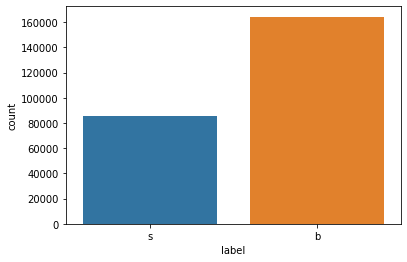

In [ ]:
sns.countplot(data=df, x='label')


<b> Observation <b>

 Background is more than signal.This is an imbalanced dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   eventid                      250000 non-null  int64  
 1   der_mass_mmc                 250000 non-null  float64
 2   der_mass_transverse_met_lep  250000 non-null  float64
 3   der_mass_vis                 250000 non-null  float64
 4   der_pt_h                     250000 non-null  float64
 5   der_deltaeta_jet_jet         250000 non-null  float64
 6   der_mass_jet_jet             250000 non-null  float64
 7   der_prodeta_jet_jet          250000 non-null  float64
 8   der_deltar_tau_lep           250000 non-null  float64
 9   der_pt_tot                   250000 non-null  float64
 10  der_sum_pt                   250000 non-null  float64
 11  der_pt_ratio_lep_tau         250000 non-null  float64
 12  der_met_phi_centrality       250000 non-null  float64
 13 

In [ ]:
df.describe()

eventid   der_mass_mmc  der_mass_transverse_met_lep  \
count  250000.000000  250000.000000                250000.000000   
mean   224999.500000     -49.023079                    49.239819   
std     72168.927986     406.345647                    35.344886   
min    100000.000000    -999.000000                     0.000000   
25%    162499.750000      78.100750                    19.241000   
50%    224999.500000     105.012000                    46.524000   
75%    287499.250000     130.606250                    73.598000   
max    349999.000000    1192.026000                   690.075000   

        der_mass_vis       der_pt_h  der_deltaeta_jet_jet  der_mass_jet_jet  \
count  250000.000000  250000.000000         250000.000000     250000.000000   
mean       81.181982      57.895962           -708.420675       -601.237051   
std        40.828691      63.655682            454.480565        657.972302   
min         6.329000       0.000000           -999.000000       -999.000000   
25%        59.388750      14.068750           -999.000000       -999.000000   
50%        73.752000      38.467500           -999.000000       -999.000000   
75%        92.259000      79.169000              0.490000         83.446000   
max      1349.351000    2834.999000              8.503000       4974.979000   

       der_prodeta_jet_jet  der_deltar_tau_lep     der_pt_tot  ...  \
count        250000.000000       250000.000000  250000.000000  ...   
mean           -709.356603            2.373100      18.917332  ...   
std             453.019877            0.782911      22.273494  ...   
min            -999.000000            0.208000       0.000000  ...   
25%            -999.000000            1.810000       2.841000  ...   
50%            -999.000000            2.491500      12.315500  ...   
75%              -4.593000            2.961000      27.591000  ...   
max              16.690000            5.684000    2834.999000  ...   

       pri_met_sumet    pri_jet_num  pri_jet_leading_pt  pri_jet_leading_eta  \
count  250000.000000  250000.000000       250000.000000        250000.000000   
mean      209.797178       0.979176         -348.329567          -399.254314   
std       126.499506       0.977426          532.962789           489.338286   
min        13.678000       0.000000         -999.000000          -999.000000   
25%       123.017500       0.000000         -999.000000          -999.000000   
50%       179.739000       1.000000           38.960000            -1.872000   
75%       263.379250       2.000000           75.349000             0.433000   
max      2003.976000       3.000000         1120.573000             4.499000   

       pri_jet_leading_phi  pri_jet_subleading_pt  pri_jet_subleading_eta  \
count        250000.000000          250000.000000           250000.000000   
mean           -399.259788            -692.381204             -709.121609   
std             489.333883             479.875496              453.384624   
min            -999.000000            -999.000000             -999.000000   
25%            -999.000000            -999.000000             -999.000000   
50%              -2.093000            -999.000000             -999.000000   
75%               0.503000              33.703000               -2.457000   
max               3.141000             721.456000                4.500000   

       pri_jet_subleading_phi  pri_jet_all_pt         weight  
count           250000.000000   250000.000000  250000.000000  
mean              -709.118631       73.064591       1.646767  
std                453.389017       98.015662       1.875103  
min               -999.000000        0.000000       0.001502  
25%               -999.000000        0.000000       0.018636  
50%               -999.000000       40.512500       1.156188  
75%                 -2.275000      109.933750       2.404128  
max                  3.142000     1633.433000       7.822543  

[8 rows x 32 columns]

In [ ]:
df.isna().sum()

eventid                        0
der_mass_mmc                   0
der_mass_transverse_met_lep    0
der_mass_vis                   0
der_pt_h                       0
der_deltaeta_jet_jet           0
der_mass_jet_jet               0
der_prodeta_jet_jet            0
der_deltar_tau_lep             0
der_pt_tot                     0
der_sum_pt                     0
der_pt_ratio_lep_tau           0
der_met_phi_centrality         0
der_lep_eta_centrality         0
pri_tau_pt                     0
pri_tau_eta                    0
pri_tau_phi                    0
pri_lep_pt                     0
pri_lep_eta                    0
pri_lep_phi                    0
pri_met                        0
pri_met_phi                    0
pri_met_sumet                  0
pri_jet_num                    0
pri_jet_leading_pt             0
pri_jet_leading_eta            0
pri_jet_leading_phi            0
pri_jet_subleading_pt          0
pri_jet_subleading_eta         0
pri_jet_subleading_phi         0
pri_jet_al

<b> Visualization <b>

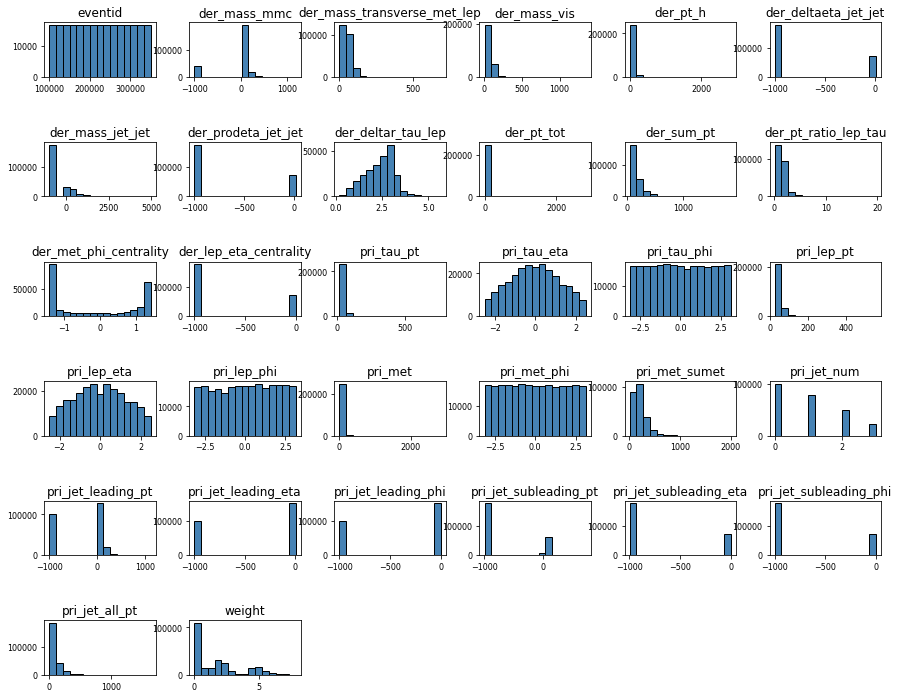

In [ ]:
ax = df.hist(figsize=(15,12),bins=15, color='steelblue', edgecolor='black', linewidth=1.0,xlabelsize=8, ylabelsize=8, grid=False)
plt.subplots_adjust(hspace = 1.2)
plt.show()

<b> Observation <b>

We can observe lots of skewed columns in the dataset.

<b> Weight vs target features<b>

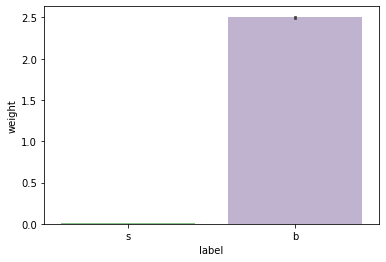

In [ ]:
sns.barplot(y="weight", x="label", data=df,palette=('Accent'))

<b> We shall drop weight column due to high bias towards background <b>

<b> Pair Plot <b>

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


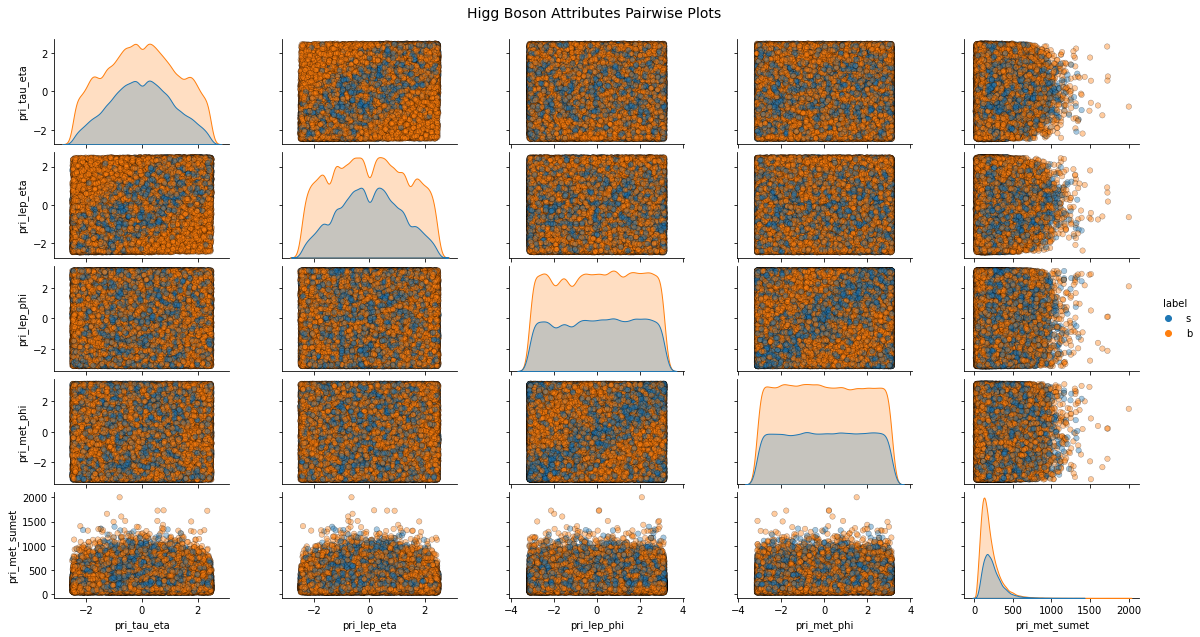

In [ ]:
col=['pri_tau_eta','pri_lep_eta','pri_lep_phi','pri_met_phi','pri_met_sumet','label']
pp = sns.pairplot(df[col], size=1.8, aspect=1.8,hue='label',
                  plot_kws = {'alpha': 0.4, 's': 30, 'edgecolor': 'k'},
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Higg Boson Attributes Pairwise Plots', fontsize=14)

<b> Observation <b>
* signal emission follows linear pattern between variable pri_lep_phi  & pri_met_phi | pri_tau_eta & pri_lep_eta

* pri_met_sumet is skewed and background is detected more than signal.



/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


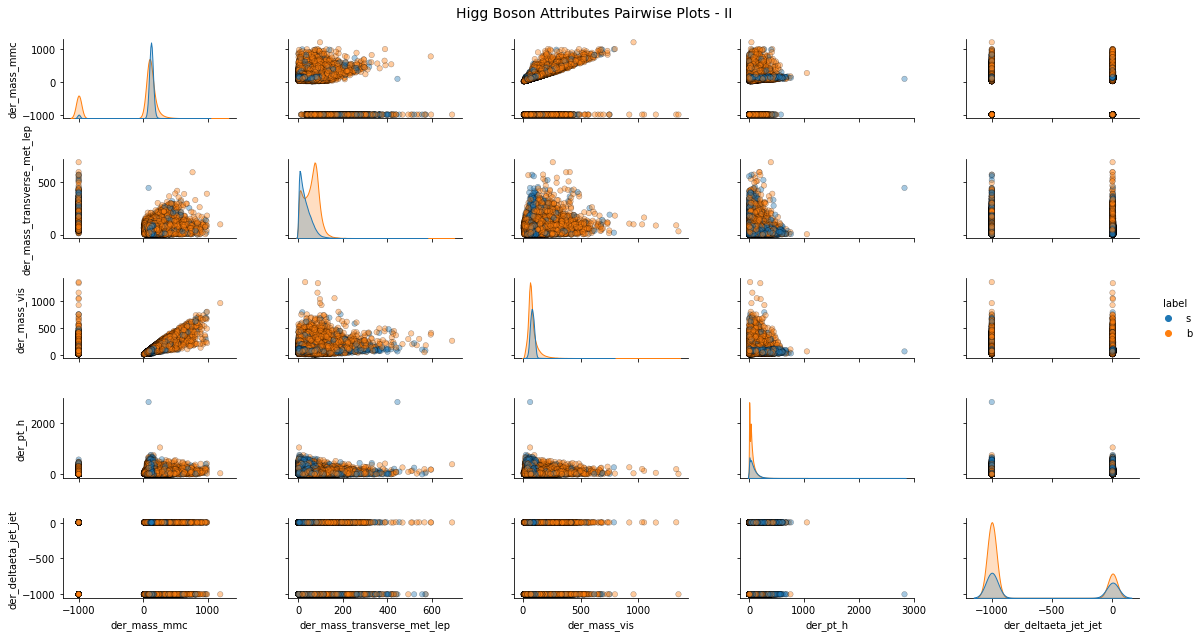

In [ ]:
col=['der_mass_mmc','der_mass_transverse_met_lep','der_mass_vis','der_pt_h','der_deltaeta_jet_jet','label']
sns.color_palette("Paired")
pp = sns.pairplot(df[col], size=1.8, aspect=1.8,hue='label',
                  plot_kws = {'alpha': 0.4, 's': 30, 'edgecolor': 'k'},
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Higg Boson Attributes Pairwise Plots - II', fontsize=14)

<b> Observation <b>

* der_mass_transverse contribute almost equally to signal and background.

* when der_mass_mmc isaround 0 to 1000,lots of signal emission is observed.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


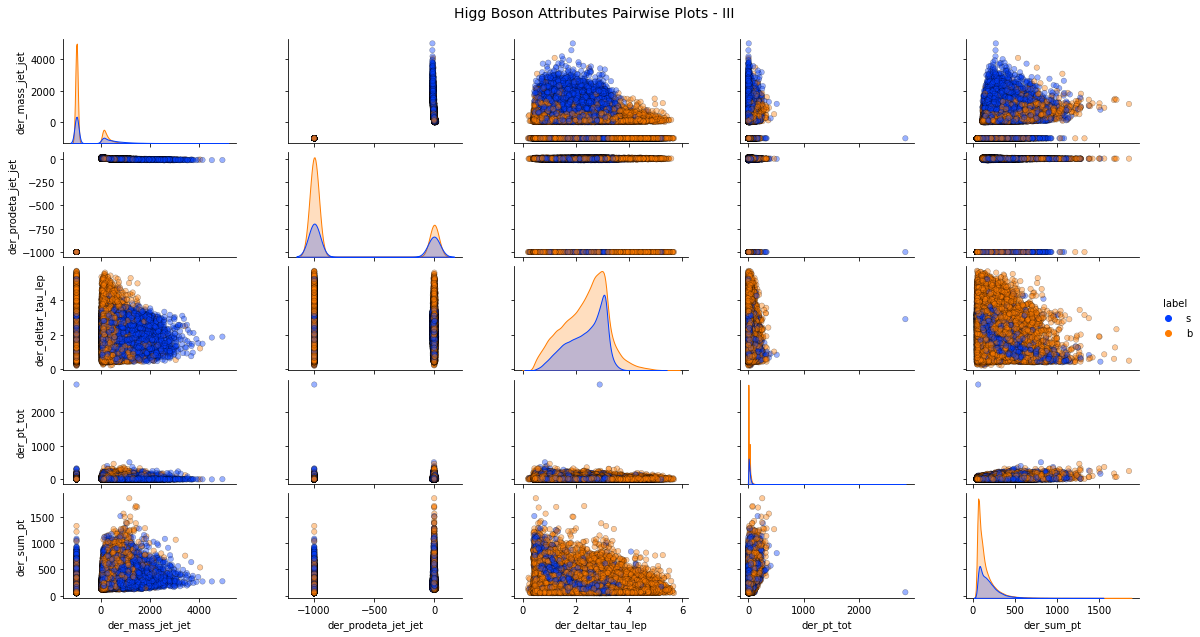

In [ ]:
col=['der_mass_jet_jet','der_prodeta_jet_jet','der_deltar_tau_lep','der_pt_tot','der_sum_pt','label']

sns.color_palette("Paired")
pp = sns.pairplot(df[col], size=1.8, aspect=1.8,hue='label',palette=('bright'),
                  plot_kws = {'alpha': 0.4, 's': 30, 'edgecolor': 'k'},
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Higg Boson Attributes Pairwise Plots - III', fontsize=14)

<b> Observation <b>

* der_madd_jet_jet -- lots of signal emitted when more than 1000.

* der_prodeta_jet_jet -- signals emitted between 0-3

* der_pt_tot --few signals emitted when values around 0.

* der_sum_pt --lots of signals are emitted when value is between 0-500.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


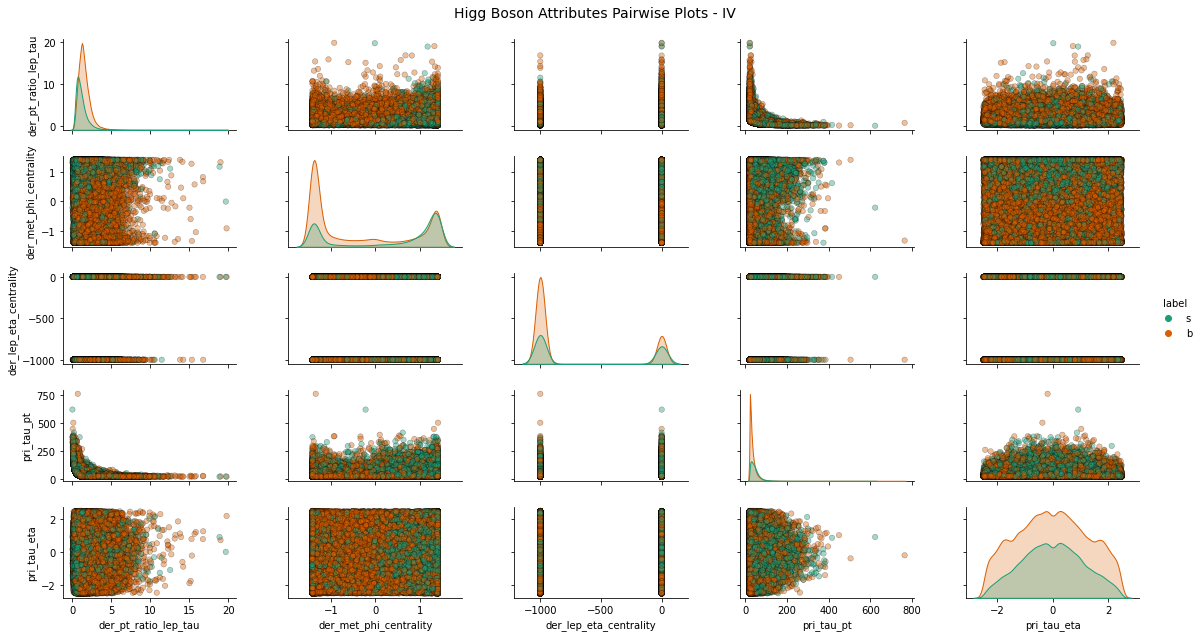

In [ ]:
col=['der_pt_ratio_lep_tau','der_met_phi_centrality','der_lep_eta_centrality','pri_tau_pt','pri_tau_eta','label']

pp = sns.pairplot(df[col], size=1.8, aspect=1.8,hue='label',palette=('Dark2'),
                  plot_kws = {'alpha': 0.4, 's': 30, 'edgecolor': 'k'},
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Higg Boson Attributes Pairwise Plots - IV', fontsize=14)


<b> Observation <b>
* der_pt_ratio_lep_tau -- lots of signal emitted when values closer to zero.
* der_met_phi_centrality -- lots of signal emitted when value is around 1.
* pri_tau_pt -- lots of signal emitted when values up to 200
* pri_tau_eta -- lots of signal emitted when values between -2 to 2.

In [5]:
df.set_index('eventid',inplace=True)

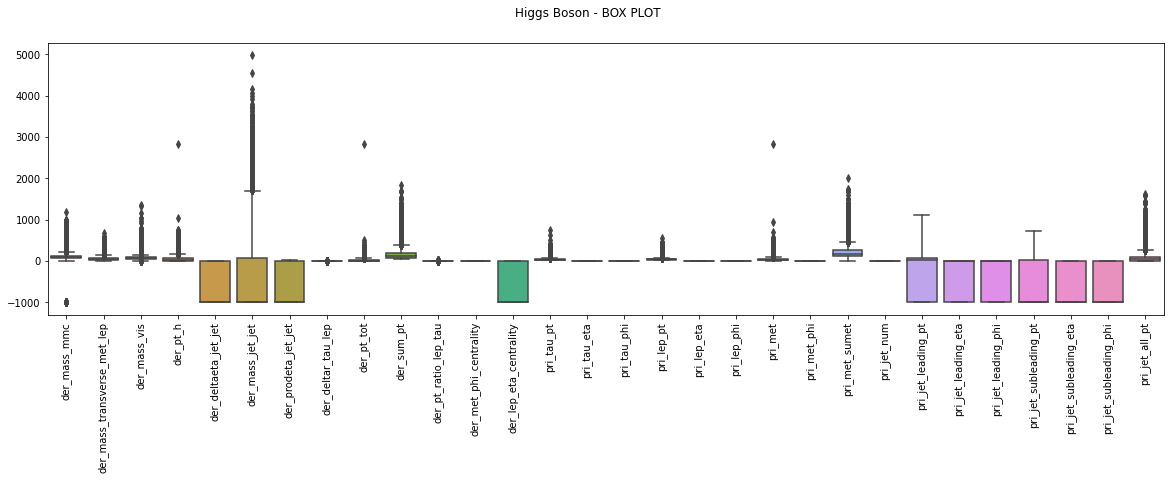

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
fig.suptitle("Higgs Boson - BOX PLOT")
ax=sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

<b> Observation <b>
 * der_mass_jet_jet has more outliers
 * IQR is between -1000 to 0 for der_deltaeta_jet_jet, der_mass_jet_jet,der_prodeta_jet_jet, der_lep_eta_centrality, pri_jet_leading_pt,pri_jet_leading_eta, pri_jet_leading_phi, pri_jet_subleading_pt,pri_jet_subleading_eta, pri_jet_subleading_phi

<b> Downsampling the data <b>
* As the dataset is imbalance and instances are around 2,50,000 .We shall downsample the dataset such that both classes are available with 50 % presence.

In [25]:
#df=c_df.copy(deep=True)
df=df.rename(columns=str.lower)
df.drop("weight",axis=1,inplace=True)

In [26]:
df.loc[df['label'] == 'b','label']= 0
df.loc[df['label'] == 's','label']= 1

In [27]:
# Class count
count_class_0, count_class_1 = df.label.value_counts()

# Divide by class
df_class_0 = df[df['label'] == 0]
df_class_1 = df[df['label'] == 1]

In [28]:
df_class_0_under = df_class_0.sample(count_class_1,replace=False)
u_df = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(u_df.label.value_counts())
u_df.reset_index(drop=True,inplace=True)

Random under-sampling:
0    85667
1    85667
Name: label, dtype: int64


<b> Scaling the data using Min Max scaler <b>

In [29]:
Y=u_df['label']
Y=Y.astype('int')
u_df.drop(columns='label',axis=0,inplace=True)

In [74]:
#Normalize the dataset
scaler=MinMaxScaler()
X=scaler.fit_transform(u_df)
X=pd.DataFrame(X,columns = u_df.columns)
X.shape


(171334, 30)

<b> Correlation between features <b>

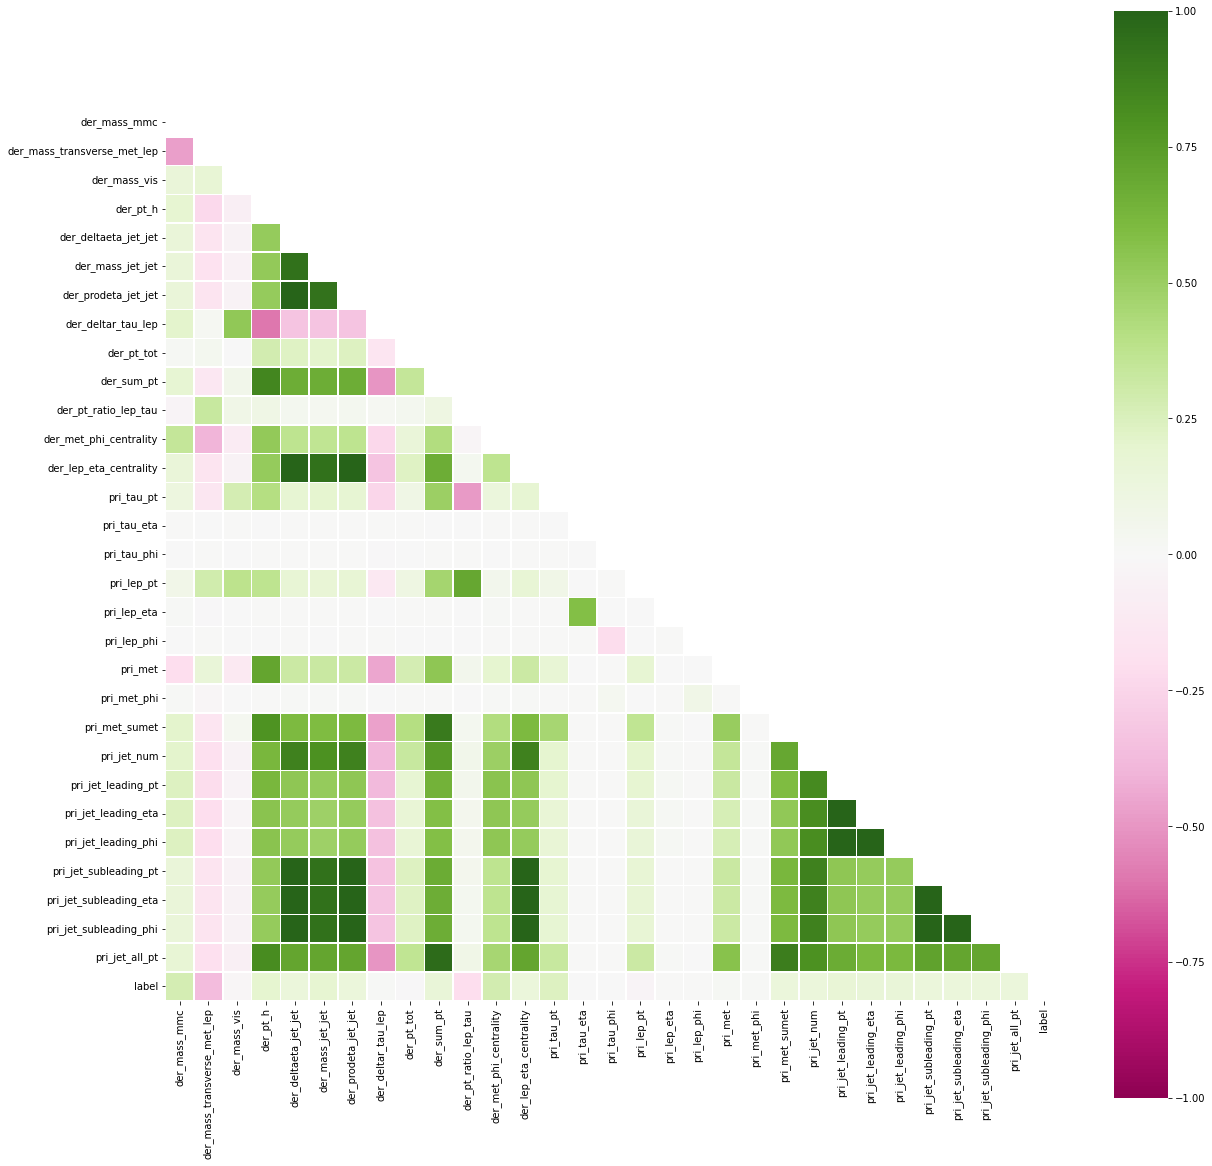

In [76]:
corr_df=X.join(Y)
plt.figure(figsize=(20,20))
cor_df=corr_df.corr()
mask=np.zeros_like(cor_df)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(cor_df,  vmin=-1, vmax=1, center=0,
     square=True,linewidth=0.5,mask=mask,cmap="PiYG")

In [77]:
#Positively correlated variables
c = cor_df.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
pos_corr=so[900:]
pos_corr.drop_duplicates(inplace=True)
print("Feature I--------------Feature II-----------Correlation values")
print(pos_corr)

Feature I--------------Feature II-----------Correlation values
der_prodeta_jet_jet     pri_jet_subleading_pt     0.999399
pri_jet_subleading_pt   pri_jet_subleading_phi    0.999405
                        pri_jet_subleading_eta    0.999405
der_lep_eta_centrality  pri_jet_subleading_pt     0.999407
der_deltaeta_jet_jet    der_prodeta_jet_jet       0.999979
der_prodeta_jet_jet     pri_jet_subleading_eta    0.999986
                        pri_jet_subleading_phi    0.999987
der_lep_eta_centrality  der_prodeta_jet_jet       0.999988
pri_jet_leading_eta     pri_jet_leading_phi       0.999991
pri_jet_subleading_eta  der_deltaeta_jet_jet      0.999994
                        pri_jet_subleading_phi    0.999994
pri_jet_subleading_phi  der_deltaeta_jet_jet      0.999995
der_lep_eta_centrality  pri_jet_subleading_eta    0.999997
pri_jet_subleading_phi  der_lep_eta_centrality    0.999997
der_lep_eta_centrality  der_deltaeta_jet_jet      0.999998
der_mass_mmc            der_mass_mmc              1.

<b> Feature Selection Method Mutual Information<b>

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [80]:
#Numerical input and Categorical Output
#Feature selection is performed using ANOVA F measure via the mutual_info_classif() function.
for k in range(2,31):
    fs = SelectKBest(score_func=mutual_info_classif, k=k)
    fs.fit(X_train, Y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    model= RandomForestClassifier(max_depth=25,min_samples_leaf= 0.000001,min_samples_split= 0.000001,n_estimators=250,random_state= 42)
    model.fit(X_train_fs, Y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    accuracy = accuracy_score(Y_test, yhat)
    print(k,"-",'Accuracy: %.2f' % (accuracy*100))

2 - Accuracy: 75.91
3 - Accuracy: 77.60
4 - Accuracy: 79.25
5 - Accuracy: 80.07
6 - Accuracy: 80.47
7 - Accuracy: 81.04
8 - Accuracy: 81.08
9 - Accuracy: 81.18
10 - Accuracy: 81.35
11 - Accuracy: 81.34
12 - Accuracy: 81.72
13 - Accuracy: 81.67
14 - Accuracy: 81.80
15 - Accuracy: 82.07
16 - Accuracy: 81.97
17 - Accuracy: 82.00
18 - Accuracy: 81.92
19 - Accuracy: 82.17
20 - Accuracy: 82.08
21 - Accuracy: 82.26
22 - Accuracy: 82.12
23 - Accuracy: 82.27
24 - Accuracy: 82.44
25 - Accuracy: 82.32
26 - Accuracy: 82.41
27 - Accuracy: 82.39
28 - Accuracy: 82.30
29 - Accuracy: 82.32
30 - Accuracy: 82.34


Feature ranking:
1. feature 0 (0.162791) - der_mass_mmc
2. feature 1 (0.098906) - der_mass_transverse_met_lep
3. feature 2 (0.088592) - der_mass_vis
4. feature 13 (0.059053) - pri_tau_pt
5. feature 11 (0.051421) - der_met_phi_centrality
6. feature 10 (0.046066) - der_pt_ratio_lep_tau
7. feature 5 (0.031289) - der_mass_jet_jet
8. feature 4 (0.031238) - der_deltaeta_jet_jet
9. feature 6 (0.030562) - der_prodeta_jet_jet
10. feature 9 (0.028772) - der_sum_pt
11. feature 24 (0.023670) - pri_jet_leading_eta
12. feature 3 (0.022803) - der_pt_h
13. feature 12 (0.022457) - der_lep_eta_centrality
14. feature 22 (0.021613) - pri_jet_num
15. feature 7 (0.021048) - der_deltar_tau_lep
16. feature 29 (0.020254) - pri_jet_all_pt
17. feature 23 (0.019891) - pri_jet_leading_pt
18. feature 19 (0.019499) - pri_met
19. feature 27 (0.019447) - pri_jet_subleading_eta
20. feature 21 (0.018381) - pri_met_sumet
21. feature 25 (0.013756) - pri_jet_leading_phi
22. feature 17 (0.012379) - pri_lep_eta
23. feature 1

Text(0.5, 1.0, 'Mutual info - Feature Importance Plot')

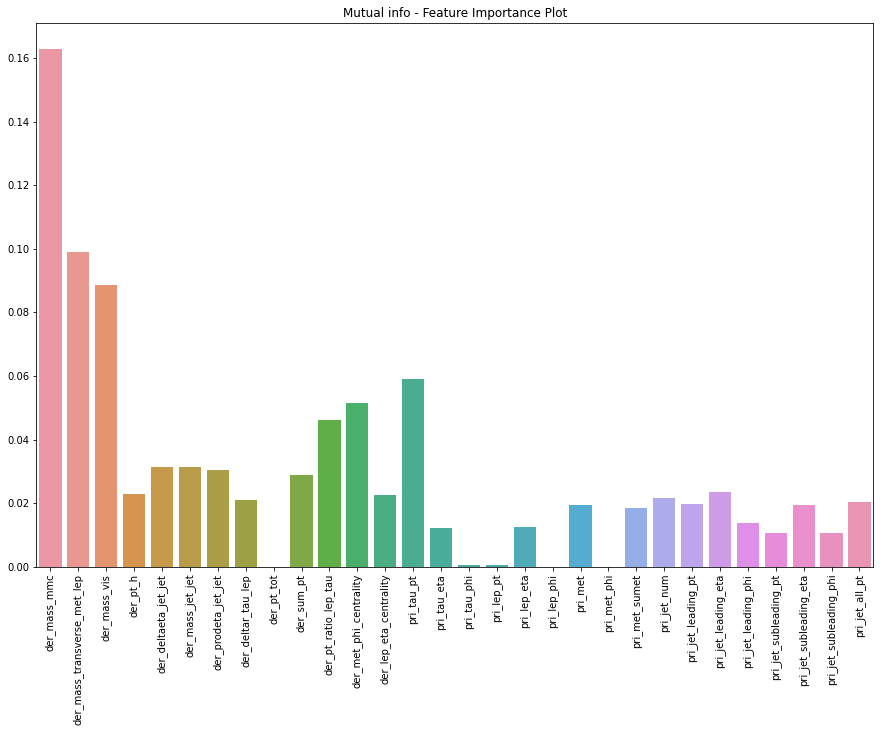

In [81]:
importances = fs.scores_

indices = np.argsort(importances)[::-1]
copy_Numerical= indices
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]),'-',X.columns[indices[f]])

# plot the scores
plt.figure(figsize=(15,10))
sns.barplot(y = fs.scores_,x = X.columns)
plt.xticks(rotation=90)
plt.title('Mutual info - Feature Importance Plot')    

In [84]:
#Selecting top 67 features giving 0.711 RMSE values
df_24=X.iloc[:,indices.tolist()[0:24]]


#<b> Deep Learning Model <b>

<b> Base line Model <b>

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(df_24, Y, test_size=0.33, random_state=13)

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=24, activation='relu',kernel_initializer='he_uniform' ))
model.add(Dense(80, activation='relu',kernel_initializer='he_uniform' ))
model.add(Dense(50, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1, kernel_initializer='he_uniform',activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, Y_train,validation_data=(X_test, Y_test) ,epochs=10)

Train on 114793 samples, validate on 56541 samples
Epoch 1/10
114240/114793 [============================>.] - ETA: 0s - loss: 0.5256 - accuracy: 0.7366

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


114793/114793 [==============================] - 8s 73us/sample - loss: 0.5252 - accuracy: 0.7369 - val_loss: 0.4866 - val_accuracy: 0.7660
Epoch 2/10
114793/114793 [==============================] - 8s 70us/sample - loss: 0.4528 - accuracy: 0.7855 - val_loss: 0.4427 - val_accuracy: 0.7957
Epoch 3/10
114793/114793 [==============================] - 8s 71us/sample - loss: 0.4323 - accuracy: 0.7986 - val_loss: 0.4431 - val_accuracy: 0.7897
Epoch 4/10
114793/114793 [==============================] - 8s 70us/sample - loss: 0.4234 - accuracy: 0.8031 - val_loss: 0.4192 - val_accuracy: 0.8058
Epoch 5/10
114793/114793 [==============================] - 8s 68us/sample - loss: 0.4175 - accuracy: 0.8071 - val_loss: 0.4225 - val_accuracy: 0.8042
Epoch 6/10
114793/114793 [==============================] - 8s 68us/sample - loss: 0.4137 - accuracy: 0.8082 - val_loss: 0.4257 - val_accuracy: 0.8032
Epoch 7/10
114793/114793 [==============================] - 8s 69us/sample - loss: 0.4120 - accuracy: 0.8

<b> Tunning Batchsize and Epochs <b> 

* Findings : Batch size=64 ,Epochs = 100

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(100, input_dim=24, activation='relu',kernel_initializer='he_uniform' ))

    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform' ))
    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform' ))
    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform' ))
    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform' ))
    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform' ))
    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform' ))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)
batch_size = [64,256]
epochs = [100,200,500]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.807750 using {'batch_size': 64, 'epochs': 100}
0.807750 (0.002064) with: {'batch_size': 64, 'epochs': 100}
0.795414 (0.002879) with: {'batch_size': 64, 'epochs': 200}
0.784368 (0.002619) with: {'batch_size': 64, 'epochs': 500}
0.805432 (0.002220) with: {'batch_size': 256, 'epochs': 100}
0.788463 (0.005026) with: {'batch_size': 256, 'epochs': 200}
0.771528 (0.003127) with: {'batch_size': 256, 'epochs': 500}
0.803647 (0.003128) with: {'batch_size': 500, 'epochs': 100}
0.791303 (0.004218) with: {'batch_size': 500, 'epochs': 200}
0.775457 (0.001358) with: {'batch_size': 500, 'epochs': 500}


<b> Tunning Optimizer <b> 

* Findings : Nadam did well

In [ ]:
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(100, input_dim=24, activation='relu',kernel_initializer='he_uniform' ))

    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform' ))
    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform' ))
    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform' ))
    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform' ))
    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform' ))
    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform' ))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0,batch_size=64,epochs=100)

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,    restore_best_weights=True)
callbacks_list = [checkpoint,earlystop]

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train,callbacks=callbacks_list,validation_split=0.1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



Epoch 1: val_loss improved from inf to 0.46855, saving model to Weights-001--0.46855.hdf5


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates



Epoch 2: val_loss improved from 0.46855 to 0.44608, saving model to Weights-002--0.44608.hdf5

Epoch 3: val_loss did not improve from 0.44608

Epoch 4: val_loss improved from 0.44608 to 0.43546, saving model to Weights-004--0.43546.hdf5

Epoch 5: val_loss did not improve from 0.43546

Epoch 6: val_loss did not improve from 0.43546

Epoch 7: val_loss improved from 0.43546 to 0.43224, saving model to Weights-007--0.43224.hdf5

Epoch 8: val_loss improved from 0.43224 to 0.41952, saving model to Weights-008--0.41952.hdf5

Epoch 9: val_loss improved from 0.41952 to 0.41531, saving model to Weights-009--0.41531.hdf5

Epoch 10: val_loss did not improve from 0.41531

Epoch 11: val_loss did not improve from 0.41531

Epoch 12: val_loss did not improve from 0.41531

Epoch 13: val_loss did not improve from 0.41531

Epoch 14: val_loss improved from 0.41531 to 0.41368, saving model to Weights-014--0.41368.hdf5

Epoch 15: val_loss improved from 0.41368 to 0.41312, saving model to Weights-015--0.4131

<b> Tunning   learning rate <b> 

* Findings : 0.001

In [ ]:
def create_model(learn_rate=0.01):
    model = Sequential()
    model.add(Dense(100, input_dim=24, activation='relu',kernel_initializer='he_uniform' ))

    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform' ))
    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform' ))
    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform' ))
    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform' ))
    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform' ))
    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform' ))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam")
    model.compile(loss='binary_crossentropy', optimizer=optimizer ,metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0,batch_size=64,epochs=100)

learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]

param_grid = dict(learn_rate=learn_rate)


checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,    restore_best_weights=True)
callbacks_list = [checkpoint,earlystop]

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train,callbacks=callbacks_list,validation_split=0.1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates



Epoch 1: val_loss improved from inf to 0.47669, saving model to Weights-001--0.47669.hdf5

Epoch 2: val_loss improved from 0.47669 to 0.47412, saving model to Weights-002--0.47412.hdf5

Epoch 3: val_loss improved from 0.47412 to 0.42439, saving model to Weights-003--0.42439.hdf5

Epoch 4: val_loss did not improve from 0.42439

Epoch 5: val_loss did not improve from 0.42439

Epoch 6: val_loss improved from 0.42439 to 0.42078, saving model to Weights-006--0.42078.hdf5

Epoch 7: val_loss did not improve from 0.42078

Epoch 8: val_loss did not improve from 0.42078

Epoch 9: val_loss improved from 0.42078 to 0.41610, saving model to Weights-009--0.41610.hdf5

Epoch 10: val_loss did not improve from 0.41610

Epoch 11: val_loss improved from 0.41610 to 0.41526, saving model to Weights-011--0.41526.hdf5

Epoch 12: val_loss did not improve from 0.41526

Epoch 13: val_loss improved from 0.41526 to 0.41103, saving model to Weights-013--0.41103.hdf5

Epoch 14: val_loss did not improve from 0.4110

<b> Tunning   kernel_initializer <b> 

* Findings : lecun_uniform did well

In [ ]:
def create_model(init_mode='uniform'):
    model = Sequential()
    model.add(Dense(100, input_dim=24, activation='relu',kernel_initializer=init_mode ))

    model.add(Dense(64, activation='relu',kernel_initializer=init_mode ))
    model.add(Dense(64, activation='relu',kernel_initializer=init_mode ))
    model.add(Dense(64, activation='relu',kernel_initializer=init_mode ))
    model.add(Dense(64, activation='relu',kernel_initializer=init_mode ))
    model.add(Dense(64, activation='relu',kernel_initializer=init_mode ))
    model.add(Dense(64, activation='relu',kernel_initializer=init_mode))
    model.add(Dense(1, kernel_initializer=init_mode,activation='sigmoid'))
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam")
    model.compile(loss='binary_crossentropy', optimizer=optimizer ,metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0,batch_size=64,epochs=100)

init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)


checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,    restore_best_weights=True)
callbacks_list = [checkpoint,earlystop]

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train,callbacks=callbacks_list,validation_split=0.1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates



Epoch 1: val_loss improved from inf to 0.47941, saving model to Weights-001--0.47941.hdf5

Epoch 2: val_loss did not improve from 0.47941

Epoch 3: val_loss improved from 0.47941 to 0.45516, saving model to Weights-003--0.45516.hdf5

Epoch 4: val_loss improved from 0.45516 to 0.43038, saving model to Weights-004--0.43038.hdf5

Epoch 5: val_loss did not improve from 0.43038

Epoch 6: val_loss improved from 0.43038 to 0.42696, saving model to Weights-006--0.42696.hdf5

Epoch 7: val_loss did not improve from 0.42696

Epoch 8: val_loss did not improve from 0.42696

Epoch 9: val_loss did not improve from 0.42696

Epoch 10: val_loss improved from 0.42696 to 0.41490, saving model to Weights-010--0.41490.hdf5

Epoch 11: val_loss did not improve from 0.41490

Epoch 12: val_loss improved from 0.41490 to 0.41227, saving model to Weights-012--0.41227.hdf5

Epoch 13: val_loss did not improve from 0.41227

Epoch 14: val_loss did not improve from 0.41227

Epoch 15: val_loss improved from 0.41227 to 

<b> Tunning   activation function <b> 

* Findings : relu did well

In [ ]:
def create_model(activation='relu'):
    model = Sequential()
    model.add(Dense(100, input_dim=24, activation=activation,kernel_initializer='lecun_uniform'))

    model.add(Dense(64, activation=activation,kernel_initializer='lecun_uniform' ))
    model.add(Dense(64, activation=activation,kernel_initializer='lecun_uniform'))
    model.add(Dense(64, activation=activation,kernel_initializer='lecun_uniform' ))
    model.add(Dense(64, activation=activation,kernel_initializer='lecun_uniform' ))
    model.add(Dense(64, activation=activation,kernel_initializer='lecun_uniform' ))
    model.add(Dense(64, activation=activation,kernel_initializer='lecun_uniform'))
    model.add(Dense(1, kernel_initializer='lecun_uniform',activation='sigmoid'))
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam")
    model.compile(loss='binary_crossentropy', optimizer=optimizer ,metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0,batch_size=64,epochs=100)

activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)


checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,    restore_best_weights=True)
callbacks_list = [checkpoint,earlystop]

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train,callbacks=callbacks_list,validation_split=0.1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/d


Epoch 1: val_loss improved from inf to 0.49826, saving model to Weights-001--0.49826.hdf5

Epoch 2: val_loss improved from 0.49826 to 0.44663, saving model to Weights-002--0.44663.hdf5

Epoch 3: val_loss did not improve from 0.44663

Epoch 4: val_loss improved from 0.44663 to 0.42767, saving model to Weights-004--0.42767.hdf5

Epoch 5: val_loss did not improve from 0.42767

Epoch 6: val_loss improved from 0.42767 to 0.41701, saving model to Weights-006--0.41701.hdf5

Epoch 7: val_loss did not improve from 0.41701

Epoch 8: val_loss improved from 0.41701 to 0.41677, saving model to Weights-008--0.41677.hdf5

Epoch 9: val_loss improved from 0.41677 to 0.41440, saving model to Weights-009--0.41440.hdf5

Epoch 10: val_loss did not improve from 0.41440

Epoch 11: val_loss did not improve from 0.41440

Epoch 12: val_loss improved from 0.41440 to 0.41092, saving model to Weights-012--0.41092.hdf5

Epoch 13: val_loss did not improve from 0.41092

Epoch 14: val_loss improved from 0.41092 to 0.

<b> Tunning drop out <b> 

* Findings : dropout 0

In [ ]:

def create_model(dropout_rate=0.0, weight_constraint=0):
    model = Sequential()
    model.add(Dense(100, input_dim=24, activation='relu',kernel_initializer='lecun_uniform'))

    model.add(Dense(64, activation='relu',kernel_initializer='lecun_uniform' ))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu',kernel_initializer='lecun_uniform'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu',kernel_initializer='lecun_uniform' ))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu',kernel_initializer='lecun_uniform' ))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu',kernel_initializer='lecun_uniform' ))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu',kernel_initializer='lecun_uniform'))
    model.add(Dense(1, kernel_initializer='lecun_uniform',activation='sigmoid'))
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam")
    model.compile(loss='binary_crossentropy', optimizer=optimizer ,metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0,batch_size=64,epochs=100)

weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,    restore_best_weights=True)
callbacks_list = [checkpoint,earlystop]

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train,callbacks=callbacks_list,validation_split=0.1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates



Epoch 1: val_loss improved from inf to 0.50891, saving model to Weights-001--0.50891.hdf5

Epoch 2: val_loss improved from 0.50891 to 0.44599, saving model to Weights-002--0.44599.hdf5

Epoch 3: val_loss improved from 0.44599 to 0.44487, saving model to Weights-003--0.44487.hdf5

Epoch 4: val_loss improved from 0.44487 to 0.43986, saving model to Weights-004--0.43986.hdf5

Epoch 5: val_loss improved from 0.43986 to 0.42962, saving model to Weights-005--0.42962.hdf5

Epoch 6: val_loss did not improve from 0.42962

Epoch 7: val_loss improved from 0.42962 to 0.41749, saving model to Weights-007--0.41749.hdf5

Epoch 8: val_loss did not improve from 0.41749

Epoch 9: val_loss did not improve from 0.41749

Epoch 10: val_loss did not improve from 0.41749

Epoch 11: val_loss improved from 0.41749 to 0.41141, saving model to Weights-011--0.41141.hdf5

Epoch 12: val_loss did not improve from 0.41141

Epoch 13: val_loss did not improve from 0.41141

Epoch 14: val_loss improved from 0.41141 to 0.

<b> Tunning kernel _constraint  <b> 

* Findings : weight constraint = 2

In [ ]:


def create_model(dropout_rate=0.0, weight_constraint=0):
    model = Sequential()
    model.add(Dense(100, input_dim=24, activation='relu',kernel_initializer='lecun_uniform',kernel_constraint=maxnorm(weight_constraint)))

    model.add(Dense(64, activation='relu',kernel_initializer='lecun_uniform',kernel_constraint=maxnorm(weight_constraint) ))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu',kernel_initializer='lecun_uniform',kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu',kernel_initializer='lecun_uniform',kernel_constraint=maxnorm(weight_constraint) ))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu',kernel_initializer='lecun_uniform',kernel_constraint=maxnorm(weight_constraint) ))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu',kernel_initializer='lecun_uniform',kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu',kernel_initializer='lecun_uniform',kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dense(1, kernel_initializer='lecun_uniform',activation='sigmoid'))
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam")
    model.compile(loss='binary_crossentropy', optimizer=optimizer ,metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0,batch_size=64,epochs=100)

weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,    restore_best_weights=True)
callbacks_list = [checkpoint,earlystop]

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train,callbacks=callbacks_list,validation_split=0.1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates



Epoch 1: val_loss improved from inf to 0.57635, saving model to Weights-001--0.57635.hdf5

Epoch 2: val_loss improved from 0.57635 to 0.44175, saving model to Weights-002--0.44175.hdf5

Epoch 3: val_loss improved from 0.44175 to 0.43477, saving model to Weights-003--0.43477.hdf5

Epoch 4: val_loss did not improve from 0.43477

Epoch 5: val_loss improved from 0.43477 to 0.42709, saving model to Weights-005--0.42709.hdf5

Epoch 6: val_loss did not improve from 0.42709

Epoch 7: val_loss did not improve from 0.42709

Epoch 8: val_loss improved from 0.42709 to 0.42314, saving model to Weights-008--0.42314.hdf5

Epoch 9: val_loss did not improve from 0.42314

Epoch 10: val_loss improved from 0.42314 to 0.41375, saving model to Weights-010--0.41375.hdf5

Epoch 11: val_loss did not improve from 0.41375

Epoch 12: val_loss did not improve from 0.41375

Epoch 13: val_loss did not improve from 0.41375

Epoch 14: val_loss did not improve from 0.41375

Epoch 15: val_loss improved from 0.41375 to 



## **<span style='color:red '>Method 1: 10 Fold Cross validation starting with base model accuracy  81.62 %</span>** 

In [31]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,    restore_best_weights=True)
callbacks_list = [checkpoint,earlystop]


def evaluateModel(mod):
    cv= KFold(n_splits=10,shuffle=True,random_state=11)
    dataX=df_24
    dataY=Y
    count=0
    for train,test in cv.split(dataX,dataY):
        histories = list()
        #Define Model
        #select data to fit the model
        Xtrain, Ytrain, Xval, Yval = dataX.iloc[train], dataY.iloc[train], dataX.iloc[test], dataY.iloc[test]
        #
        history=mod.fit(Xtrain, Ytrain,epochs=100,batch_size=64,verbose=0,validation_data=(Xval, Yval),callbacks=callbacks_list)
        count+=1
        #Capturing loss and accuracy
        loss, acc = model.evaluate(Xval, Yval, verbose=0)
        print('Fold ',count)
        print('Validation Loss',loss)
        print("Validation Accuracy")
        print('> %.3f' % (acc * 100.0))
        histories.append(history)
    for i in range(len(histories)):
        # plot loss
        plt.subplot(211)
        plt.title('Cross Entropy Loss')
        plt.xlabel('epochs')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='val_test')
        plt.legend(bbox_to_anchor=(1.1, 1.05))

        # plot accuracy
        plt.subplot(212)
        plt.title('Classification Accuracy')
        plt.xlabel('epochs')
        plt.ylabel('Accuracies')
        #plt.title('Accuracy vs No. of epochs')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='val_test')
        plt.legend(bbox_to_anchor=(1.1, 1.05))

    plt.tight_layout(pad=3.0)
    plt.show() 

    loss, acc = mod.evaluate(Xval, Yval, verbose=0)
    print('Testing loss \t', loss)
    print('Testing accuracy ', acc * 100, '%')
    return mod


Epoch 1: val_loss improved from inf to 0.45298, saving model to Weights-001--0.45298.hdf5

Epoch 2: val_loss improved from 0.45298 to 0.43099, saving model to Weights-002--0.43099.hdf5

Epoch 3: val_loss did not improve from 0.43099

Epoch 4: val_loss improved from 0.43099 to 0.41670, saving model to Weights-004--0.41670.hdf5

Epoch 5: val_loss did not improve from 0.41670

Epoch 6: val_loss improved from 0.41670 to 0.41467, saving model to Weights-006--0.41467.hdf5

Epoch 7: val_loss improved from 0.41467 to 0.40863, saving model to Weights-007--0.40863.hdf5

Epoch 8: val_loss improved from 0.40863 to 0.40483, saving model to Weights-008--0.40483.hdf5

Epoch 9: val_loss did not improve from 0.40483

Epoch 10: val_loss did not improve from 0.40483

Epoch 11: val_loss did not improve from 0.40483

Epoch 12: val_loss did not improve from 0.40483

Epoch 13: val_loss did not improve from 0.40483
Fold  1
Validation Loss 0.40483023279311847
Validation Accuracy
> 81.131

Epoch 1: val_loss im

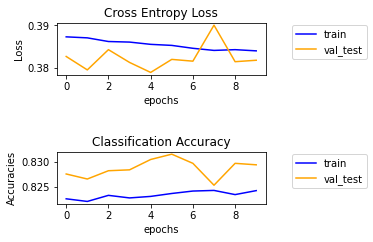

Testing loss 	 0.37888372008613896
Testing accuracy  83.04441571235657 %


In [33]:
model = Sequential()

model.add(Dense(100, input_dim=24, activation='relu',kernel_initializer='lecun_uniform'))

model.add(Dense(64, activation='relu',kernel_initializer='lecun_uniform' ))

model.add(Dense(64, activation='relu',kernel_initializer='lecun_uniform'))

model.add(Dense(64, activation='relu',kernel_initializer='lecun_uniform' ))

model.add(Dense(64, activation='relu',kernel_initializer='lecun_uniform' ))

model.add(Dense(64, activation='relu',kernel_initializer='lecun_uniform'))

model.add(Dense(64, activation='relu',kernel_initializer='lecun_uniform'))
model.add(Dense(1, kernel_initializer='lecun_uniform',activation='sigmoid'))
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam")
model.compile(loss='binary_crossentropy', optimizer=optimizer ,metrics=['accuracy'])
mod=evaluateModel(model)

<b> Observation <b>

10 fold cross validation trained on hyper tuned deep learning model.
The accuracy achieved 83.04 % on test data.                                                            The variations between 81.34% to 83.04 % 

In [34]:
mod.save("hbkfold_kerasModel.h5")

## **<span style='color:red '>Method 2: Bagging Ensemble Neural networks</span>** 

In [5]:
wdf=pd.concat([df_24,Y],axis=1)
wdf.shape

(171334, 25)

In [6]:
X, newX, y, newy = train_test_split(df_24, Y, test_size=0.2, random_state=13,stratify=Y)


In [8]:
print(X.shape)
print(newX.shape)
print(y.shape)
print(newy.shape)

(137067, 24)
(34267, 24)
(137067, 1)
(34267, 1)


In [7]:
y.value_counts()

label
1        68534
0        68533
dtype: int64

In [10]:
# evaluate a single mlp model
def bagEvalModel(trainX, trainy, testX, testy):
    model = Sequential()
    weight_constraint=2

    model.add(Dense(100, input_dim=24, activation='relu',kernel_initializer='lecun_uniform',kernel_constraint=maxnorm(weight_constraint), kernel_regularizer=regularizers.L1L2(l1=0.000005,l2=0.000005)))

    model.add(Dense(600, activation='relu',kernel_initializer='lecun_uniform',kernel_constraint=maxnorm(weight_constraint) ))
    model.add(Dense(600, activation='relu',kernel_initializer='lecun_uniform',kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dense(600, activation='relu',kernel_initializer='lecun_uniform',kernel_constraint=maxnorm(weight_constraint) ))
    model.add(Dense(64, activation='relu',kernel_initializer='lecun_uniform',kernel_constraint=maxnorm(weight_constraint) ))
    model.add(Dense(64, activation='relu',kernel_initializer='lecun_uniform',kernel_constraint=maxnorm(weight_constraint)))

    model.add(Dense(1, kernel_initializer='lecun_uniform',activation='sigmoid'))
    opt=tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='binary_crossentropy', optimizer=opt ,metrics=['accuracy'])

    history = model.fit(trainX, trainy,validation_data=(testX,testy) ,epochs=100,batch_size=64)

    # evaluate the model
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return model, test_acc


# multiple train-test splits    
n_splits = 10
scores, members = list(), list()    
count=1
for _ in range(n_splits):
    # select indexes
    print("Split :",_)
    ix = [i for i in range(len(X))]
  
    train_ix = resample(ix, replace=True, n_samples=15000)
    test_ix = [x for x in ix if x not in train_ix]
  
    # select data
    trainX, trainy = X.iloc[train_ix], y.iloc[train_ix]
    testX, testy = X.iloc[test_ix], y.iloc[test_ix]
    print("train :",trainy.value_counts())
    print("test :",testy.value_counts())
    # evaluate model
    model, test_acc = bagEvalModel(trainX, trainy, testX, testy)
    print('>%.3f' % test_acc)
    scores.append(test_acc)
    members.append(model)
    model.save(str(count)+"hbagModel.h5")
    count=count+1
  # summarize expected performance
print('Estimated Accuracy %.3f (%.3f)' % (mean(scores), std(scores)))

Split : 0
train : label
1        7510
0        7490
dtype: int64
test : label
1        61447
0        61416
dtype: int64
Train on 15000 samples, validate on 122863 samples
Epoch 1/100
14976/15000 [============================>.] - ETA: 0s - loss: 0.6279 - accuracy: 0.6643

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


15000/15000 [==============================] - 10s 666us/sample - loss: 0.6280 - accuracy: 0.6642 - val_loss: 0.5787 - val_accuracy: 0.7093
Epoch 2/100
15000/15000 [==============================] - 10s 637us/sample - loss: 0.5606 - accuracy: 0.7239 - val_loss: 0.5458 - val_accuracy: 0.7350
Epoch 3/100
15000/15000 [==============================] - 10s 650us/sample - loss: 0.5322 - accuracy: 0.7425 - val_loss: 0.5317 - val_accuracy: 0.7425
Epoch 4/100
15000/15000 [==============================] - 10s 654us/sample - loss: 0.5214 - accuracy: 0.7471 - val_loss: 0.5175 - val_accuracy: 0.7500
Epoch 5/100
15000/15000 [==============================] - 9s 631us/sample - loss: 0.5147 - accuracy: 0.7518 - val_loss: 0.5154 - val_accuracy: 0.7509
Epoch 6/100
15000/15000 [==============================] - 9s 632us/sample - loss: 0.5087 - accuracy: 0.7535 - val_loss: 0.5082 - val_accuracy: 0.7551
Epoch 7/100
15000/15000 [==============================] - 10s 635us/sample - loss: 0.5012 - accuracy:

> 1: single=0.798, ensemble=0.798
> 2: single=0.785, ensemble=0.803
> 3: single=0.791, ensemble=0.808
> 4: single=0.794, ensemble=0.813
> 5: single=0.793, ensemble=0.814
> 6: single=0.794, ensemble=0.815
> 7: single=0.797, ensemble=0.816
> 8: single=0.797, ensemble=0.817
> 9: single=0.788, ensemble=0.816
> 10: single=0.795, ensemble=0.817
Mean Accuracy 0.793 (0.004)


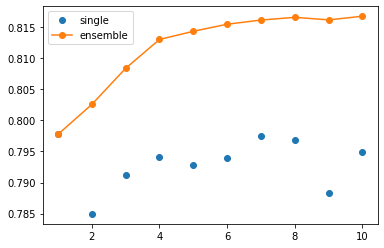

In [42]:
# make an ensemble prediction for binary-class classification
def ensemble_predictions(members, testX):
    # make predictions
    yhats = [model.predict(testX) for model in members]
    yhats = array(yhats)
    # Fidning mean across ensemble members
    ymean = np.mean(yhats, axis=0)
    #if mean values more than 0.5,then it is one otherwise zero 
    result =  (ymean > 0.5).astype(int)
    return result     


# evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testy):
	# select a subset of members
	subset = members[:n_members]
	# make prediction
	yhat = ensemble_predictions(subset, testX)
	# calculate accuracy
	return accuracy_score(testy, yhat)

# evaluate different numbers of ensembles on hold out set
single_scores, ensemble_scores = list(), list()
for i in range(1, n_splits+1):
    ensemble_score = evaluate_n_members(members, i, newX, newy)
    _, single_score = members[i-1].evaluate(newX, newy, verbose=0)
    print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
    ensemble_scores.append(ensemble_score)
    single_scores.append(single_score)
# plot score vs number of ensemble members
print('Mean Accuracy %.3f (%.3f)' % (mean(single_scores), std(single_scores)))
x_axis = [i for i in range(1, n_splits+1)]
pyplot.plot(x_axis, single_scores, marker='o', linestyle='None')
pyplot.plot(x_axis, ensemble_scores, marker='o')
pyplot.legend(labels=['single','ensemble'])
pyplot.show()

 Bagging Ensemble models approach was attempted for 10 deep learning models. 15000 sample instances taken for training the model to reduce time and computational resources.
These ensemble models predcited much better than single model.Accuracy of 81.7% could be achieved with 8 models. 

 # **<span style='color:red'>Final conclusion</span>**
 <b> 
 * Approach 1: Ten Kflodcross validation trained model has given an accuracy of 82.45%.

 * Approach 2: Bagging Ensemble models has given maximum accuracy of 81.7%.

 * We shall go with 10 KFold cross validation trained model as our final model. <b>

In [5]:
from keras.models import load_model
model=load_model('hkfoldModel.h5')

## **<span style='color:red'>Explainable AI</span>**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_24, Y, test_size=0.33, random_state=1)
x_train=X_train.sample(200)
x_train=x_train.to_numpy()
x_test=X_test.to_numpy()

In [7]:
import shap
shap.initjs()

In [8]:
explainer = shap.DeepExplainer(model, x_train)
shap_values = explainer.shap_values(x_test)

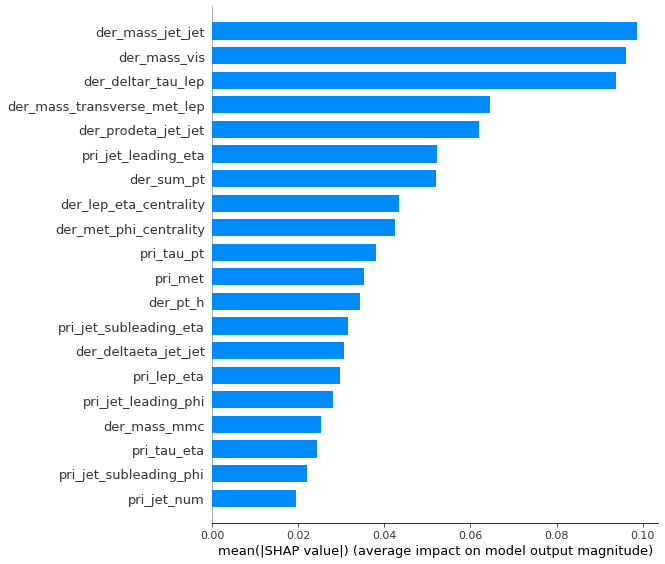

In [19]:
shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = X_test.columns)

In [20]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], features = X_test.columns)

In [13]:
shap.initjs()
shap.force_plot(explainer.expected_value[0],
                shap_values[0][:10], 
                x_test)

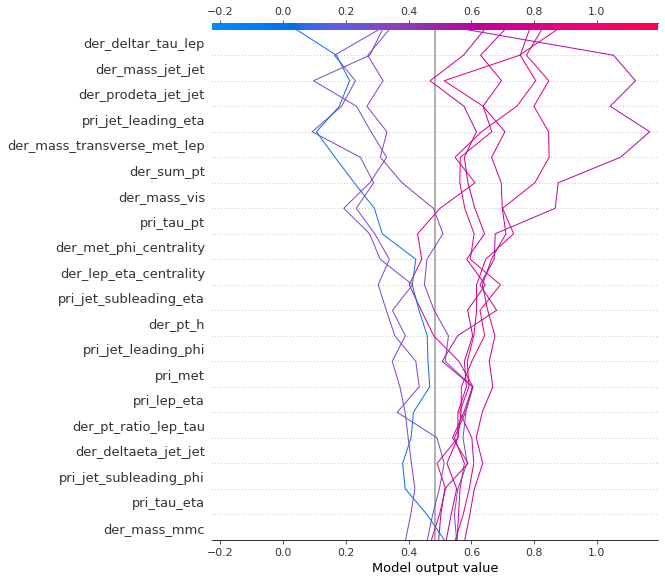

In [14]:
shap.initjs()
shap.decision_plot(explainer.expected_value[0],shap_values[0][:10], 
                   feature_names=X_test.columns.tolist())

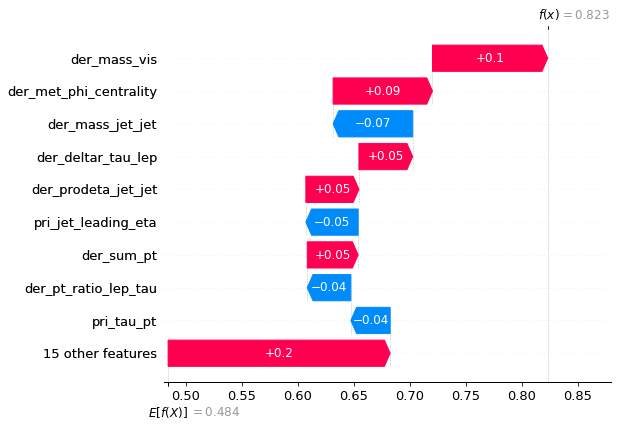

In [15]:
shap.initjs()
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0][0], feature_names = X_test.columns)